In [12]:
import joblib

from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

In [13]:
model = joblib.load('../models/default_probability_model.pkl')

x_train = joblib.load('../models/x_train.pkl')
x_test = joblib.load('../models/x_test.pkl')
y_train = joblib.load('../models/y_train.pkl')
y_test = joblib.load('../models/y_test.pkl')

In [14]:
y_proba = model.predict_proba(x_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_proba)

print(roc_auc)

0.9050888053471204


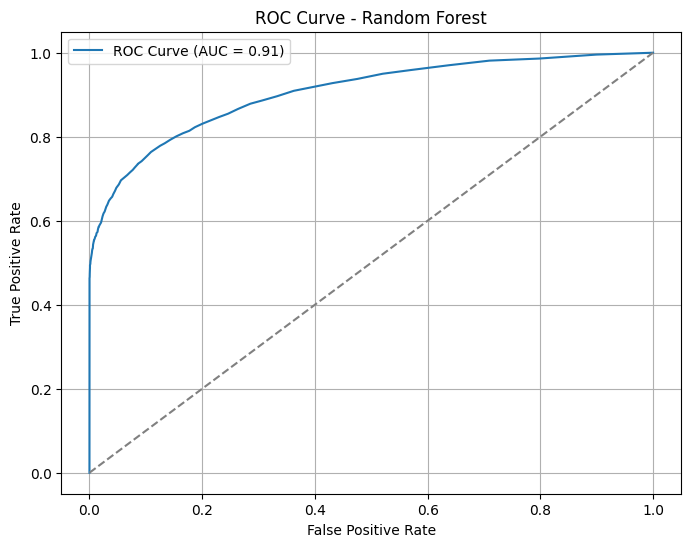

In [15]:
y_pred = model.predict(x_test)

report = classification_report(y_test, y_pred, output_dict=True)

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.grid(True)

<Figure size 600x500 with 0 Axes>

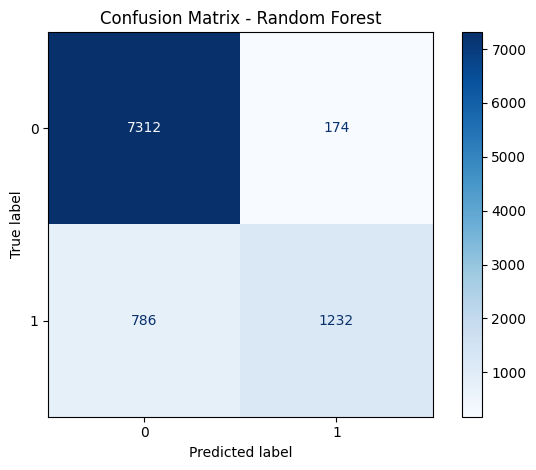

In [16]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
disp.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix - Random Forest")
plt.grid(False)
plt.tight_layout()
plt.show()

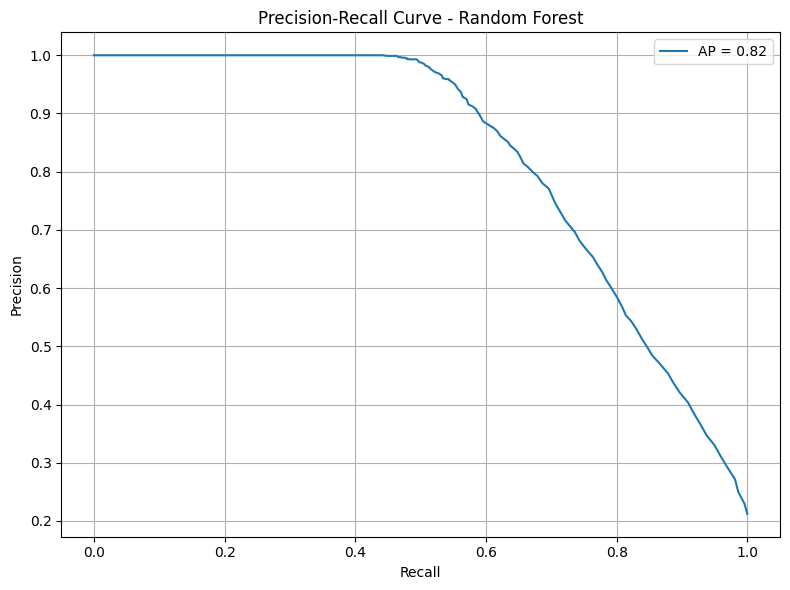

In [17]:
# Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
avg_precision = average_precision_score(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f"AP = {avg_precision:.2f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Random Forest")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()